# Testing widgets

In [1]:
import ipywidgets as wdg

In [2]:
# clear the outpu
from IPython.display import clear_output

In [3]:
wdg.HTML(
    value="XCO2 values",
    placeholder= "Some HTML",
    description= "Some HTML"
)

HTML(value='XCO2 values', description='Some HTML', placeholder='Some HTML')

In [4]:
# date picker
date_pick =wdg.DatePicker(
    description= 'Pick a Date',
    disabled= False
)

date_pick

DatePicker(value=None, description='Pick a Date')

# SAMPLE dataset from 2014_2017_cali
### OBJECTIVE:
- To test widgets on the PYDECK graph

In [5]:
import pydeck as pdk
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from IPython.display import display

In [6]:
df_oco2=pd.read_csv('sample_data_2014_2017.csv')

In [7]:
# df_oco2.to_csv("cali_oco2.csv", index= False)

In [8]:
df_oco2.head(3)

,Xco2,Latitude,Longitude,Year,Month,Day
0,398.08090,32.026478,-119.082306,2014,11,1
1,397.96307,32.014620,-119.074036,2014,11,1
2,397.37230,32.002600,-119.065830,2014,11,1


In [9]:
df_oco2['Year'].unique()

array([2014, 2015, 2016, 2017], dtype=int64)

<AxesSubplot:ylabel='Xco2'>

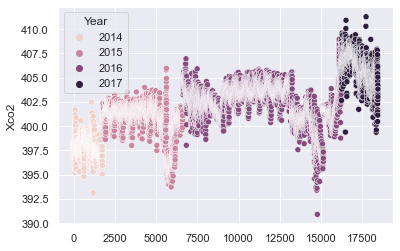

In [11]:
sns.scatterplot(data= df_oco2, x= np.arange(0, len(df_oco2)), y= "Xco2", hue="Year")

# Widgets from month: TESTING

In [13]:
# month
ALL= 'ALL'

def by_month(d):

#    my_date= np.array(d)
    my_date= d.unique().tolist()
    my_date.sort()
    my_date.insert(0, ALL)
    
    return my_date


In [16]:
dropdown_month= wdg.Dropdown(options= by_month(df_oco2.Month))
# capture output
#month_output= wdg.Output()

month_output= wdg.Output()

# handler, binding the handler to the dropdown
def dropdown_month_eventhandler(change):
#    clear_output()
    month_output.clear_output()

    # clearing the output in each iteration of option
     
    with month_output:
        
        if (change.new == ALL):           
# #         clear_output()
             display(df_oco2.tail())    
           
        # display by the selected OPTION(here, month selected)
        # 'change.new' IN-BUILT function to select 
        else:
            display(df_oco2[df_oco2.Month == change.new])

            
#     if (wdg.Output()):
#         clear_output()
    
#     else:
#         display(df_oco2[df_oco2.Month == change.new])

#    display(df_oco2[df_oco2.Month == change.new])

    

dropdown_month.observe(dropdown_month_eventhandler, names= 'value')

display(dropdown_month)

Dropdown(options=('ALL', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value='ALL')

In [17]:
display(month_output)

Output()

In [ ]:
# display(month_output)

In [ ]:
# Xco2 Color range FOR california region has XCO2 range from 400- 417
# Ranges: 395-405, 400-410, 410-420, 420> 

def xco2_color(c):
    
#     if ((c> 400.00) & (c < 405.00)):
#         return [10, 230, 120]
    
#     elif((c> 405.00) & (c < 410.00)):
#         return [20, 200, 160]
     #elif (c> 415.00) & (c < 420.00):
    r= np.arange(400,410)
    
    if (c < 405.00):
        #return [10, 230, 120]
        return [255, 215, 0]
    
    elif((c > 405.00) & (c < 410.00)):
        return [0, 201, 87]
    
    elif((c > 410.00) & (c < 415.00)):
        #return [200, 100, 20]
        return [255,215,0]

    elif(c>415):
        # red
        return [255,48,48]
    #return [230, 158, 10]

In [ ]:
df_oco2['xco2_color']= df_oco2['Xco2'].apply(xco2_color)

In [ ]:
MAP_API_KEY= 'pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhvd3lpNnFhZzJwdDlhbWU5emRyNSJ9.TlYL-IIZB9gEkX31muNvdQ'

# import os

# MAP_API_KEY= os.environ.get('YOUR PRIVATE_API_KEY')

In [ ]:
# VIEW STATE: to 
view= pdk.data_utils.compute_view(df_oco2[["Longitude","Latitude"]])
# view= pdk.ViewState(latitude= 32.80, longitude= -97, pitch= 50, zoom =1)

# Scatter plot lAYER

In [ ]:
# Layer
scatterPlot_layer= pdk.Layer(
    #"ColumnLayer",
    "ScatterplotLayer",
#    "PathLayer",
#    "ArcLayer",
    data= df_oco2,  
    opacity= 0.8,
    stroked= True,
    filled= True,
    radius_scale= 30,
    radius_min_pixels= 2,
    radius_max_pixels= 100,
    line_width_min_pixels= 1,

    get_position= "coordinates",

    get_fill_color= "xco2_color",
    # hover
    pickable= True
)


tooltip_a={
    "html": "<b>XCO2 => {Xco2}</b>",
#    "html": "<b>quality=> {quality_flag}</b>",
    "style": {"background": "grey", "color":"black", "font-family":"Arial"}
}


# DECK
r= pdk.Deck(
    layers=[scatterPlot_layer],
    #layers=[scatterPlot_layer],
    initial_view_state=view,
    map_provider="mapbox",
#    map_style= pdk.map_styles.SATELLITE,
    map_style= 'mapbox://styles/mapbox/light-v10',
    mapbox_key= MAP_API_KEY,
    # data point hover info
    tooltip= [tooltip_a]

)

#Widgets
select_months= 'Months'

# function for month iteration
def unique_month(arr):
    by_months= arr.unique().tolist()
    by_months.sort()
    by_months.insert(0, select_months)
    
    return by_months
    
    
selector= wdg.Dropdown(
    options= df_oco2.Month.unique().tolist(), 
    value= 1,
    description= 'Months:',
    disabled= False,
)

# rendering the selector
def render():
    global r
    global selector
    display(selector)
    
    date= np.arange(1,13)
    r.layers[0].data = df_oco2[df_oco2['Month'] == 4]
    
    r.update()   
    display(r.to_html('test.html'))


def on_selection(change):
    global r
    global df_oco2
    
    r.layers[0].data= df_oco2[df_oco2['Month'] == change['new']]
    r.update()
    
        
selector.observe(on_selection, names= 'value')  
render()

# deck_output= wdg.Output()

#r.to_html("xco2_test_widget.html")

In [ ]:
# display(r.to_html())

# Adding CONTOUR LAYER: 
* To detect XCO2 with higher values

In [ ]:
# df_csv_oco2= pd.read_csv("cali_oco2.csv")

# df_csv_oco2= df_csv_oco2.drop(columns= ["DateTime", "Day","Date" ])
# df_csv_oco2.head(3)

In [ ]:
df_oco2["Xco2"].describe()

# Dictionary: contour files to hold XOC2> 415

In [ ]:
high_xco2_val= np.array(df_oco2["Xco2"][df_oco2["Xco2"] >416])
len(high_xco2_val)


my_dictionary=[]
keys=["threshold", "color", "strokeWidth"]

high_xco2= range(len(df_oco2[df_oco2["Xco2"] >415]))
stroke_width= 8

for j in range(0, len(high_xco2_val)):

    my_dictionary.append({"threshold":high_xco2_val[j], "color": [153,50,204], "strokeWidth": stroke_width})


In [ ]:
my_dictionary

In [ ]:
# df_csv_oco2["Xco2"].quantile([0.95])

In [ ]:
min_xco2= np.linspace(400, 405)

In [ ]:
p405= df_oco2["Xco2"].min()
p410= df_oco2["Xco2"].mean()
p415= df_oco2["Xco2"].max()

In [ ]:
df_oco2["Xco2"].quantile([0.25])

In [ ]:
# Range of XOC2, higher xco2
#p405, p410, p415= df_oco2["Xco2"].quantile([0.25, 0.50,0.95])

# Stroke width
stroke_width= 8
# contours
contour_xco2=[
    {"threshold":p405, "color":[240,255, 255], "strokeWidth": stroke_width},
    {"threshold":p410, "color":[240,255, 255], "strokeWidth": stroke_width},
    {"threshold":p415, "color":[153,50,204], "strokeWidth": stroke_width},
]

In [ ]:
contour_xco2

In [ ]:
plt.hist(df_oco2["Xco2"], bins=40)
plt.axvline(df_oco2["Xco2"].mean(), c='r');

In [ ]:
# in meters
cell_size= 3000

xco2_contour= pdk.Layer(
    "ContourLayer",
    data= df_oco2,
    #get_position= ["Longitude", "Latitude"],
    get_position= "coordinates",
    #contours= contour_xco2,
    contours= contour_xco2,
    cell_size= cell_size,
    #aggregation= pdk.types.String("MEAN"),
    get_weight= "Xco2",
   # pickable= True,

)


d= pdk.Deck(
    layers=[ xco2_contour,scatterPlot_layer],
    initial_view_state=view,
    map_provider="mapbox",
#    map_style= pdk.map_styles.SATELLITE,
    map_style= 'mapbox://styles/mapbox/light-v10',
    mapbox_key= MAP_API_KEY,
    # data point hover info
#    tooltip= [tooltip_a]

)
d.to_html("contour_test.html")

In [ ]:
# help(pdk.Layer)

In [ ]:
# selector= wdg.Dropdown(
#     options= list(set(np.array(df_oco2.Month))),
#     value= '1',
#     description= 'Month',
#     disabled= False,
# )

# selector= wdg.IntSlider(
    
# )

# SINGLE month

In [ ]:
testing_months= np.arange(5,9)
testing_months

In [ ]:
# TEST
df_single_month= df_oco2[df_oco2['Month'].isin(testing_months)]
df_single_month= df_single_month.drop(columns=["DateTime", "Date"])
df_single_month.head(2)

# CONTNOUR LAYER from pydeck

In [ ]:
# df_single_month["Xco2"].quantile([.25])

In [ ]:
high_xco2_summer= np.array(df_single_month["Xco2"][df_single_month["Xco2"] >415])
len(high_xco2_summer)

In [ ]:
# quantiles
p1, p2, p3= df_single_month["Xco2"].quantile([0.75, 0.9, 0.99])
p1, p2, p3

In [ ]:
my_dictonary_sum=[]
keys=["threshold", "color", "strokeWidth"]

#high_xco2= range(len(df_oco2[df_oco2["Xco2"] >415]))
stroke_width= 5

for j in range(0, len(high_xco2_summer)):

    my_dictonary_sum.append({"threshold":high_xco2_summer[j], "color": [0, 238,224], "strokeWidth": stroke_width})


In [ ]:
my_dictonary_sum[:5]

In [ ]:
# Layer
scatterPlot_layer= pdk.Layer(
    #"ColumnLayer",
    "ScatterplotLayer",
#    "PathLayer",
#    "ArcLayer",
    data= df_single_month,  
    opacity= 0.8,
    stroked= True,
    filled= True,
    radius_scale= 30,
    radius_min_pixels= 2,
    radius_max_pixels= 100,
    line_width_min_pixels= 1,

    get_position= "coordinates",

    get_fill_color= "xco2_color",
    # hover
    pickable= True
)

# COUNTOUR
# in meters
cell_size= 1000

xco2_contour_summer= pdk.Layer(
    "ContourLayer",
    data= df_single_month,
    #get_position= ["Longitude", "Latitude"],
    get_position= "coordinates",
    #contours= contour_xco2,
    contours= my_dictonary_sum,
    cell_size= cell_size,
    #aggregation= pdk.types.String("MEAN"),
    get_weight= "Xco2",
   # pickable= True,

)



tooltip_a={
    "html": "<b>XCO2 => {Xco2}</b>",
#    "html": "<b>quality=> {quality_flag}</b>",
    "style": {"background": "grey", "color":"black", "font-family":"Arial"}
}


# DECK
summer_xoc2= pdk.Deck(
    layers=[scatterPlot_layer, xco2_contour_summer],
    #layers=[scatterPlot_layer],
    initial_view_state=view,
    map_provider="mapbox",
#    map_style= pdk.map_styles.SATELLITE,
    map_style= 'mapbox://styles/mapbox/light-v10',
    mapbox_key= MAP_API_KEY,
    # data point hover info
    tooltip= [tooltip_a]

)

#Widgets
# slider= widgets.IntSlider(value= 1, min= 1, max= 12, step = 1)
# play= widgets.Play(value= 1, min= 1, max= 12, step= 1, description= 'Months',
#                   interval= 1_000)
# widgets.jslink((play, 'value'), (slider, 'value'))
# layout= widgets.HBox([slider, play])


# # function: that passes slider to change MONTHS
# def update_plot(Month):
#     # pass the data from JSON file
#     scatterPlot_layer.data= df_oco2_json[df_oco2_json['Month'] == Month]
#     return r.update()

# # creating an interaction with widgets
# #interact= widgets.interactive_output(update_plot, {'Month': slider});

# interact= widgets.interactive_output(update_plot, {'Month': slider});
# display(layout, interact)


# display and update the map layer




summer_xoc2.to_html("summer_xco2.html")